<a href="https://colab.research.google.com/github/NickRubinic2552/class2.ipynb/blob/main/Homework03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 03: You will run Logistic Regression, K-Nearest Neighbor, Decision Tree, and Random Forest Classifier to predict survival for the Titanic Dataset.

## Then, you will check and print the performance of your model.

---------

#### First, get all your required packages. Note: the list below is not exhaustive, if you need more packages, please import them as needed.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### We are going to obtain the Titanic dataset from DataScienceDojo's github page. Thank you to them for the readily available data.

Here is the link: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

Import the file as a DataFrame called `titanic`.

In [29]:
# https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **`Survived`** is your target variable, also known as your dependent variable.

## Your attributes/features/independent variables will help predict survival on the Titanic.

### But first, you need to preprocess the data.


*  Note: **`Survived`** is your target variable (**Y**).

* **`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`**, and **`Fare`** will certainly be important predictors of whether a passenger survived or not. Hence, they will be included in your attributes list (**X**).

* The **`Name`, `Ticket`**, and **`Cabin`** are not useful features. Someone's name has no bearing on whether they survive or not. Similarly, a ticket number is just a unique identifier for a passenger - it is not meaningful, ordered data. So we can drop these 3. **NOTE**: NEVER drop variables from the original dataset. Either create a new df for relevant features, or create a copy of titanic and then drop the ones you do not want.
*   Where they **`Embarked`** can be meaningful, but the data is a string variable. Let us convert it to an integer. This can be done with **`np.where`** or with **label encoding**. I will help you with this step. You have to do the rest of the preprocessing steps.






In [ ]:
titanic.Embarked.unique()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic['embarked'] = le.fit_transform(titanic['Embarked'])

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


### Perfect! Now You can use Pclass, Sex, Age, SibSp, Parch, Fare, and embarked as your features.

Step 1: First shuffle your dataset.
Step 2: Create X and Y arrays. You can refer to the class file for this. Y is the target (single column), X comprises all the relevant features.

In [15]:





titanic = shuffle(titanic, random_state=42)

Y = titanic['Survived'].values
X = titanic.drop(columns=['Survived']).values


print("X sample:\n", X[:5])
print("Y sample:\n", Y[:5])



X sample:
 [[879 3 'Laleff, Mr. Kristo' 'male' nan 0 0 '349217' 7.8958 nan 2]
 [278 2 'Parkes, Mr. Francis "Frank"' 'male' nan 0 0 '239853' 0.0 nan 2]
 [505 1 'Maioni, Miss. Roberta' 'female' 16.0 0 0 '110152' 86.5 'B79' 2]
 [243 2 'Coleridge, Mr. Reginald Charles' 'male' 29.0 0 0 'W./C. 14263'
  10.5 nan 2]
 [740 3 'Nankoff, Mr. Minko' 'male' nan 0 0 '349218' 7.8958 nan 2]]
Y sample:
 [0 0 1 0 0]


## 1. Logistic Regression

### Use this model to predict survival on the Titanic.    
## Part I:
### First, use a 80:20 train-test split. Run your logistic regression prediction model.  
### Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

## Part II: Repeat all the above with a 60:40 split.   

## Compare the results between Part 1 and Part 2. Which split gave you better results in your opinion?


### Part 1: 80:20 Train-Test Split ###
Test Size: 20.0%
Accuracy: 0.7902
Precision: 0.8367
Recall (Sensitivity): 0.6508
F1-Score: 0.7321
Specificity: 0.9000
Confusion Matrix:
[[72  8]
 [22 41]]


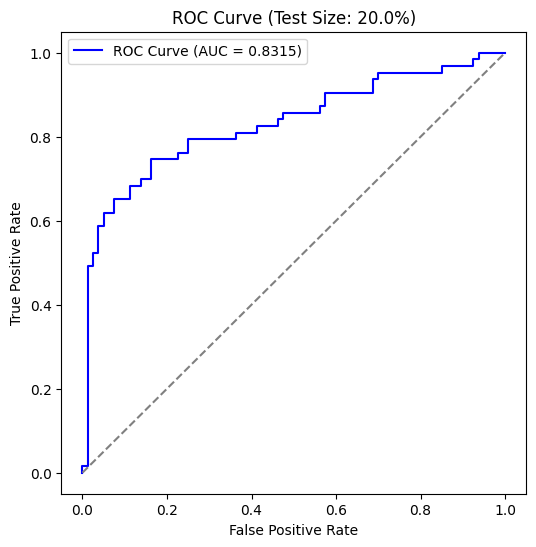


### Part 2: 60:40 Train-Test Split ###
Test Size: 40.0%
Accuracy: 0.7684
Precision: 0.7193
Recall (Sensitivity): 0.7069
F1-Score: 0.7130
Specificity: 0.8107
Confusion Matrix:
[[137  32]
 [ 34  82]]


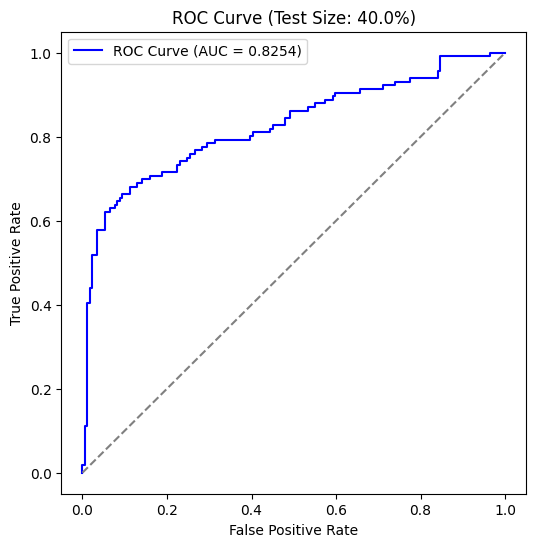

In [17]:



    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)


    model = LogisticRegression()
    model.fit(X_train, Y_train)


    Y_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve


    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)  # Specificity
    sensitivity = recall  # Sensitivity (same as recall)

 \
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)

    # Print metrics
    print(f"Test Size: {test_size * 100}%")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    # Plot ROC Curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Test Size: {test_size * 100}%)')
    plt.legend()
    plt.show()

# Run for 80:20 Split
print("### Part 1: 80:20 Train-Test Split ###")
train_evaluate_logistic_regression(X, Y, test_size=0.2)

# Run for 60:40 Split
print("\n### Part 2: 60:40 Train-Test Split ###")
train_evaluate_logistic_regression(X, Y, test_size=0.4)




## Now K Nearest Neighbors:

## 2. KNN: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split. Run your KNN choosing 3 nearest neighbors.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. Plot the ROC curve.

Part II: Repeat the above with neighbors = 5.

Compare the results between Part 1 and Part 2. Which neighbor selection gave you better results?

### Part 1: K = 3 ###
K = 3
Accuracy: 0.7832
Precision: 0.8200
Recall (Sensitivity): 0.6508
F1-Score: 0.7257
Specificity: 0.8875
Confusion Matrix:
[[71  9]
 [22 41]]


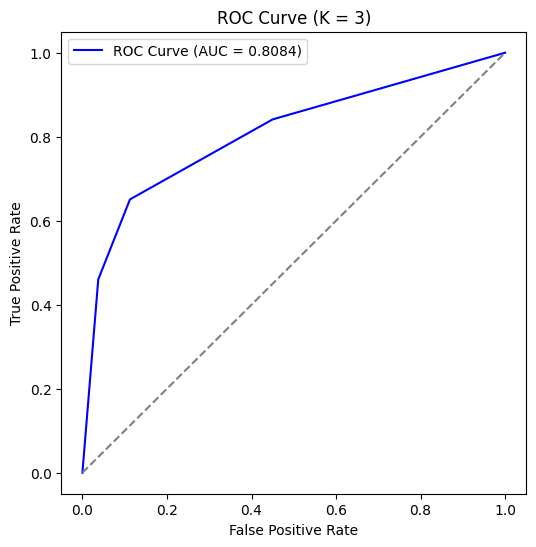


### Part 2: K = 5 ###
K = 5
Accuracy: 0.7832
Precision: 0.8077
Recall (Sensitivity): 0.6667
F1-Score: 0.7304
Specificity: 0.8750
Confusion Matrix:
[[70 10]
 [21 42]]


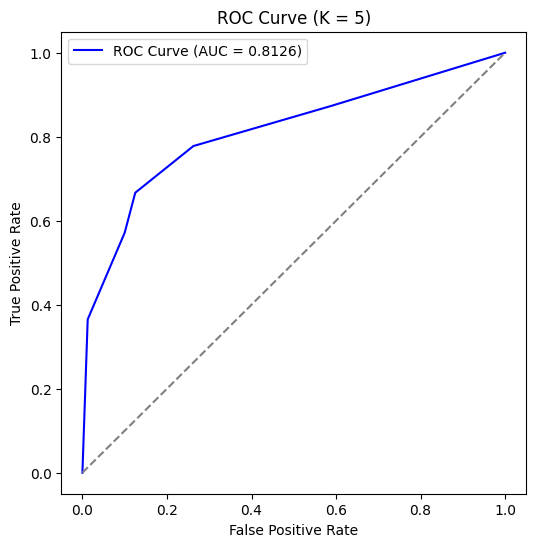

In [19]:


titanic.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
titanic.dropna(inplace=True)


le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'].astype(str))

Y = titanic['Survived'].values
X = titanic.drop(columns=['Survived']).values


scaler = StandardScaler()
X = scaler.fit_transform(X)


def train_evaluate_knn(X, Y, k_neighbors):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


    model = KNeighborsClassifier(n_neighbors=k_neighbors)
    model.fit(X_train, Y_train)


    Y_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)


    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = recall


    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"K = {k_neighbors}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")


    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (K = {k_neighbors})')
    plt.legend()
    plt.show()

print("### Part 1: K = 3 ###")
train_evaluate_knn(X, Y, k_neighbors=3)

print("\n### Part 2: K = 5 ###")
train_evaluate_knn(X, Y, k_neighbors=5)


### Part 1: K = 3 ###
K = 3
Accuracy: 0.7832
Precision: 0.8200
Recall (Sensitivity): 0.6508
F1-Score: 0.7257
Specificity: 0.8875
Confusion Matrix:
[[71  9]
 [22 41]]


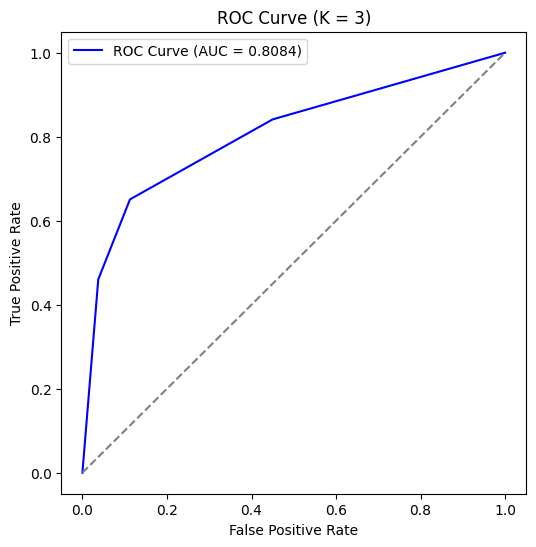


### Part 2: K = 5 ###
K = 5
Accuracy: 0.7832
Precision: 0.8077
Recall (Sensitivity): 0.6667
F1-Score: 0.7304
Specificity: 0.8750
Confusion Matrix:
[[70 10]
 [21 42]]


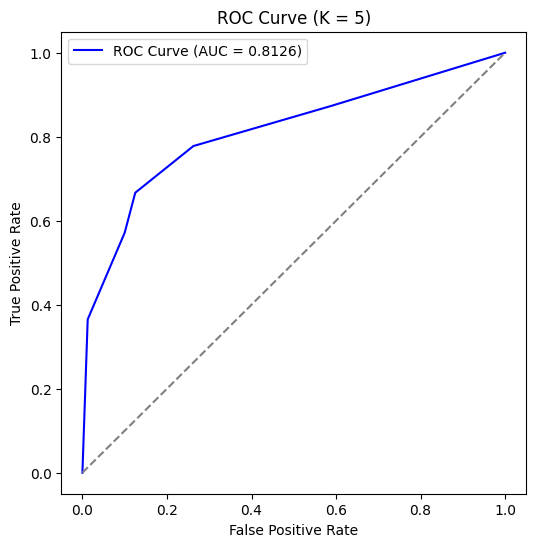

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt



# Load the Titanic dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


titanic.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
titanic.dropna(inplace=True)


le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'].astype(str))


Y = titanic['Survived'].values
X = titanic.drop(columns=['Survived']).values

scaler = StandardScaler()
X = scaler.fit_transform(X)


def train_evaluate_knn(X, Y, k_neighbors):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    model = KNeighborsClassifier(n_neighbors=k_neighbors)
    model.fit(X_train, Y_train)


    Y_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Removed the extra ']'
    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = recall


    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)

    print(f"K = {k_neighbors}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")


    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (K = {k_neighbors})')
    plt.legend()
    plt.show()


print("### Part 1: K = 3 ###")
train_evaluate_knn(X, Y, k_neighbors=3)

print("\n### Part 2: K = 5 ###")
train_evaluate_knn(X, Y, k_neighbors=5)




In [8]:
# convert Sex to 1 and 0 where 1 is female
titanic['Sex'] = np.where(titanic['Sex'] == 'female', 1, 0)
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked']]
y = titanic['Survived']

KeyError: "['embarked'] not in index"

## Finally, Tree-Methods:

## 3. Decision Tree: Use this model to predict survival on the Titanic.

Part I:

Use a 80:20 train-test split.

Then, report the accuracy, precision, recall, f-score, sensitivity, specificity, and the confusion matrix. **Plot** the ROC curve.

Part II: Repeat the above with a 50:50 train test split.

Compare the results between Part 1 and Part 2. Which split gave you better results?

Try a Random Forest Classifier as well. Works very similarly to how a decision tree does.

In [9]:

  def train_evaluate_model(X, Y, test_size, model, model_name):
    """
    Trains and evaluates a given model, calculating and printing various performance metrics.

    Args:
        X (array-like): The feature data.
        Y (array-like): The target variable data.
        test_size (float): The proportion of the dataset to include in the test split.
        model: The machine learning model to be trained and evaluated.
        model_name (str): The name of the model for printing purposes.
    """
    from sklearn.model_selection import train_test_split  # Import train_test_split here
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
    import matplotlib.pyplot as plt

    # Split dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Train model
    model.fit(X_train, Y_train)

    # Make predictions
    Y_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

    # Performance metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)  # Specificity
    sensitivity = recall  # Sensitivity (same as recall)

    # ROC Curve
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)

    # Print metrics
    print(f"\n{model_name} - Test Size: {test_size * 100}%")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    # Plot ROC Curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name} (Test Size: {test_size * 100}%)')
    plt.legend()
    plt.show()

